<a href="https://colab.research.google.com/github/Diyon335/PRA3500/blob/master/Week1/final_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### WEEK 1: PROBABILITY AND PROBABILITY DISTRIBUTIONS

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 

from scipy.stats import norm, poisson, binom, expon, skew, kurtosis

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

# Probability Relations

In [0]:
#Bayes' theorem to infer P(A|B)
def P_A_given_B(P_B_given_A , P_A , P_B):
  return (P_B_given_A * P_A)/ P_B

#Re-arrangement of P(B) = P(A)*P(B|A) OR P(Ac)*P(B|Ac) to get P(A). Infer the tree diagram a few cell blocks below
def P_a(P_B, P_B_given_Ac ,P_B_given_A):
  return (P_B - P_B_given_Ac)/(P_B_given_A - P_B_given_Ac)

Let the event 'A' be choosing someone with antibodies\
Let the event 'B' be confirming that the person has antibodies

Event B is done after A

Xc denotes the complementary event of an event X

P(A)  = 0.01 \
P(Ac) = 0.99

P(B|A)   = 0.99\
P(Bc|A)  = 0.01\
P(B|Ac)  = 0.05\
P(Bc|Ac) = 0.95

In [76]:
P_A  = 0.01 
P_Ac = 0.99

P_B_given_A   = 0.99
P_Bc_given_A  = 0.01
P_B_given_Ac  = 0.05
P_Bc_given_Ac = 0.95

#Probability that the person was confirmed to have the antibodies P(B) = P(A)*P(B|A) OR P(Ac)*P(B|Ac)
P_B = (P_A * P_B_given_A) + (P_Ac * P_B_given_Ac)

#Therefore the probability that someone has the antibodies, given that he was confirmed to have the antibodies: P(A|B)
P_A_given_B(P_B_given_A,P_A,P_B)

0.16666666666666669

link to used tree diagram: https://prntscr.com/s0qf26


In [77]:
#What should P(A) be for P(B) > 50% ?
P_B          = 0.5
P_B_given_Ac = 0.05
P_B_given_A  = 0.99  

P_A = P_a(P_B, P_B_given_Ac, P_B_given_A)

print("The percentage of people with antibodies should be greater than: {}%".format(int(P_A * 100)))

The percentage of people with antibodies should be greater than: 47%


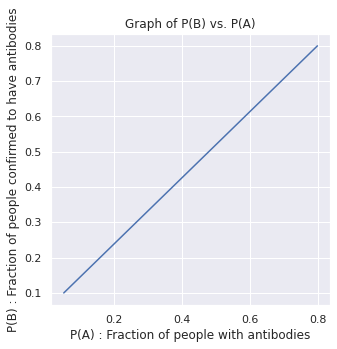

In [78]:
#Chosen P(B) values
P_B_array = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8]
P_A_array = np.zeros(shape= len(P_B_array))

for element in range(len(P_A_array)):
  P_A_array[element] = P_a(P_B_array[element], P_B_given_Ac, P_B_given_A)

plt.plot(P_A_array , P_B_array)
plt.xlabel("P(A) : Fraction of people with antibodies")
plt.ylabel("P(B) : Fraction of people confirmed to have antibodies")
plt.title("Graph of P(B) vs. P(A)")
plt.show()

# Probability Distributions & Optional task

In [0]:
######################### Constants/ Defaults / Methods used #########################

#The different shapes of distributions used for this exercise
shapes = ["Gaussian", "Poisson","Binomial","Exponential"]

size = 1000
gauss_mean = 0
gauss_std = 1

poisson_mu = 3

binom_p = 0.8
binom_n = 10

e_mean = 5

#Gets a cumulative distribution function of specified shape and data
def getShapeCDF(shape,data):
  if(shape=="Gaussian"):
    return norm.cdf(data)
  if(shape=="Poisson"):
    return poisson.cdf(data,poisson_mu)
  if(shape=="Binomial"):
    return binom.cdf(data,binom_n,binom_p)
  if(shape=="Exponential"):
    return expon.cdf(data,e_mean)
  
  return "Shape does not exist"

#checks if your range is of type: array
def isArray(array):
  try:
    size = len(array)
  except:
    print("The object containing your range of values must be an array with size (2)")
    return False
  return True

#checks if your range is proper, i.e. has two values only: min and max
def isValidRange(array):
  if(len(array) != 2):
    print ("The object containing your range of values must be of size (2)")
    return False
  return True
#Checks if your shape is valid
def isValidShape(shape):
  for i in range(len(shapes)):
    if(shapes[i]==shape):
      return True
  return False

######################### Types of distributions #########################

#Gaussian
def getGaussianData():
  return norm.rvs(size = size, loc = gauss_mean, scale = gauss_std)

#Poisson
def getPoissonData():
  return poisson.rvs(size = size, mu=poisson_mu)

#Binomial
def getBinomialData():
  return binom.rvs(size=size, p = binom_p, n= binom_n)

#Exponential
def getExpoData():
  return expon.rvs(size=size, loc= e_mean)

######################### plotter #########################

def plotDistribution(shape, data, xRange, cdfRange, xTitle, yTitle, computeCDF = True, displayContinuousDist = False):
  if(isValidShape(shape)==False):
    print("Invalid shape")
    return
  if(isArray(xRange) == False):
    return
  if(computeCDF):
    if(isArray(cdfRange)==False):
      return
    if(isValidRange(cdfRange)==False):
      return
    
    area = getShapeCDF(shape, cdfRange[1]) - getShapeCDF(shape, cdfRange[0])
    
  else:
    area = "Not computed"
  
  if(isValidRange(xRange)==False):
    return

  ax = sns.distplot(data,bins=10,hist=True,color='black',kde = displayContinuousDist, hist_kws={"color":'blue',"edgecolor":"skyblue","linewidth":0, "alpha":1},norm_hist=True)
  
  ax.set(xlabel = xTitle , ylabel = yTitle, xlim = (xRange[0],xRange[1]))

  print("P({} < x < {}) = {}".format(cdfRange[0],cdfRange[1],area))
  print("Mean: {}".format(np.mean(data)))
  print("Variance: {}".format(np.var(data)))
  print("Skew: {}".format(skew(data)))
  print("Kurtosis: {}".format(kurtosis(data)))
  return 





P(-33 < x < 93) = 1.0
Mean: 0.057837784397639785
Variance: 0.9701567280301454
Skew: -0.04637328087411238
Kurtosis: -0.19502728691581916


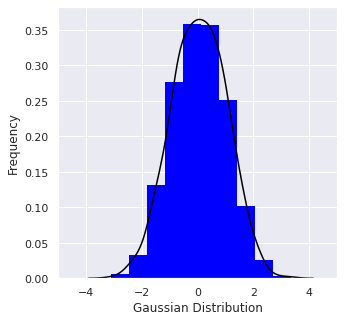

In [80]:
xValues = [-5,5]
cdf = [-33,93]

plotDistribution("Gaussian", getGaussianData(), xValues, cdf , "Gaussian Distribution","Frequency",True,True)

P(-3 < x < 7.5) = 0.9880954961436426
Mean: 2.894
Variance: 2.9467639999999995
Skew: 0.6852410135524432
Kurtosis: 0.7967663784812666


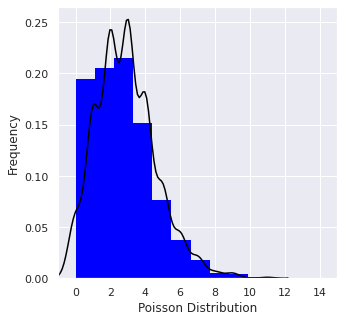

In [81]:
xValues = [-1,15]
cdf = [-3,7.5]

plotDistribution("Poisson", getPoissonData(), xValues, cdf , "Poisson Distribution","Frequency",True,True)

P(-3 < x < 7.5) = 0.3222004736
Mean: 8.008
Variance: 1.6739359999999999
Skew: -0.5135288473130388
Kurtosis: 0.1537302345947178


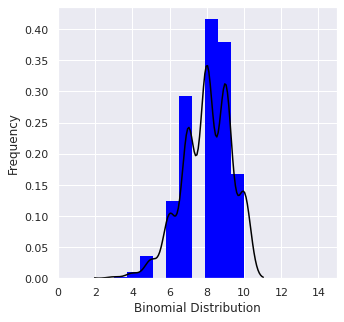

In [82]:
xValues = [0,15]
cdf = [-3,7.5]

plotDistribution("Binomial", getBinomialData(), xValues, cdf , "Binomial Distribution","Frequency",True,True)

P(5 < x < 13) = 0.9996645373720975
Mean: 6.032490845391998
Variance: 1.1175113190966532
Skew: 2.403079643873013
Kurtosis: 9.128413156285296


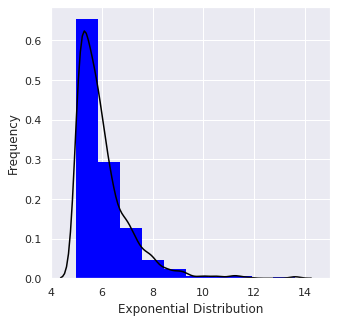

In [83]:
xValues = [4,15]
cdf = [5,13]

plotDistribution("Exponential", getExpoData(), xValues, cdf , "Exponential Distribution","Frequency",True,True)

# Expected values

In [0]:
def p_gaussian(x):
  return norm.pdf(x)

def getExpected(function):
  return norm.expect(function,lb=-100000,ub=100000)

In [85]:
getExpected(p_gaussian)

0.0

# References

Stats usage and API:\
1) https://www.datacamp.com/community/tutorials/probability-distributions-python